In [1]:
import gensim
import re
import os
from gensim.models import Word2Vec
from pprint import pprint
import nltk
from nltk.corpus import brown
len(brown.words())

C:\Users\gartl\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


1161192

In [2]:
lines = open('data folder/movie_dialogue.txt', encoding='utf-8', errors='ignore').read().split('\n')
lines[:10]


['\ufeffL1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!',
 'L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!',
 'L985 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I hope so.',
 'L984 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ She okay?',
 "L925 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Let's go.",
 'L924 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ Wow',
 "L872 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Okay -- you're gonna need to learn how to lie.",
 'L871 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ No',
 'L870 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I\'m kidding.  You know how sometimes you just become this "persona"?  And you don\'t know how to quit?',
 'L869 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Like my fear of wearing pastels?']

In [3]:
corpus=[]
for line in lines:
    _line=line.split('+++$+++')
    if len(_line)==5:
        corpus.append(_line[4].lower().strip())
corpus[:10]

['they do not!',
 'they do to!',
 'i hope so.',
 'she okay?',
 "let's go.",
 'wow',
 "okay -- you're gonna need to learn how to lie.",
 'no',
 'i\'m kidding.  you know how sometimes you just become this "persona"?  and you don\'t know how to quit?',
 'like my fear of wearing pastels?']

In [4]:
def clean_text(text):
    '''Clean text by removing unnecessary characters and altering the format of words.'''

    
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)
    text = re.sub(r'\ufeff','',text)
    
    return text




In [5]:
clean_corpus=[]
for conv in corpus:
    clean_corpus.append(clean_text(conv))

In [6]:
corpus_data=[line.split() for line in clean_corpus if re.findall('[A-z]+',line)]
corpus_data[100:110]

[['it', 'is', 'more'],
 ['perm'],
 ['patrick', 'is', 'that', 'a'],
 ['it', 'is', 'just', 'you'],
 ['is',
  'that',
  'woman',
  'a',
  'complete',
  'fruitloop',
  'or',
  'is',
  'it',
  'just',
  'me'],
 ['no', 'i', 'just', 'wanted'],
 ['what',
  'to',
  'completely',
  'damage',
  'me',
  'to',
  'send',
  'me',
  'to',
  'therapy',
  'forever',
  'what'],
 ['i', 'just', 'wanted'],
 ['you', 'set', 'me', 'up'],
 ['let', 'go']]

In [7]:
model = gensim.models.Word2Vec(
        corpus_data,
        size=50,
        window=3,
        min_count=4,
        workers=5)
model.train(corpus_data, total_examples=len(corpus_data), epochs=8)

(17974012, 26780800)

In [9]:
pprint(model.wv.similarity('nine','eight'))
pprint(model.wv.most_similar('man',topn=5))
model.wv['garden'].shape

0.90962565
[('woman', 0.8518689870834351),
 ('guy', 0.796202540397644),
 ('girl', 0.7594528794288635),
 ('lady', 0.7546859383583069),
 ('fella', 0.7516603469848633)]


C:\Users\gartl\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


(50,)

In [63]:
result = model.most_similar(positive=['woman','king'], negative=['man']) #north-south+east = travelled (assumed answer: west), this code could calculate vectors but it's answer is not precise
print("{}: {:.4f}".format(*result[0]))

queen: 0.7600


C:\Users\gartl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\gartl\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [34]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE # make multi-dimension vectors into 2D or 3D
import numpy as np
% matplotlib inline

words_ak = []
embeddings_ak = []
for word in list(model.wv.vocab):
    embeddings_ak.append(model.wv[word])
    words_ak.append(word)
    
pprint(words_ak[:10])
pprint(embeddings_ak[:2])  


tsne_model_ak_2d = TSNE(perplexity=8, n_components=2, init='pca', n_iter=250, random_state=16)
embeddings_ak_2d = tsne_model_ak_2d.fit_transform(embeddings_ak)


['feds',
 'tankers',
 'fuckups',
 "knife'",
 'mote',
 'lieutenant',
 'uused',
 'culvert',
 'junction',
 "terry's"]
[array([-0.5205378 , -0.39428446, -0.43700796, -0.3080591 , -0.09759833,
        0.56295943,  0.06275576,  0.31595835,  0.07221282, -0.61024845,
       -0.5416148 ,  0.4591549 , -0.33016428, -0.10100896, -0.4719511 ,
        0.03362798,  0.30231923, -0.06845224,  0.17611927,  0.12211996,
       -0.18966463,  0.25139582, -0.3788898 ,  0.2144861 ,  0.5025104 ,
       -0.7045957 ,  0.22080809,  0.12386969,  0.4149885 , -0.6337022 ,
       -0.21367238, -0.05582318,  0.08368336, -0.26368678, -0.01028856,
        0.5285414 ,  0.18305281, -0.34649035, -0.15468864, -0.16982728,
       -0.30633688, -0.04331405,  0.02557469,  0.5893448 ,  0.53357995,
       -0.10963952, -0.1849263 ,  0.3112167 , -0.53229386, -0.17047998],
      dtype=float32),
 array([-0.10343222,  0.0746942 , -0.03619966,  0.13688523, -0.21970148,
        0.07480293,  0.04579003, -0.14371602,  0.10389613, -0.122919

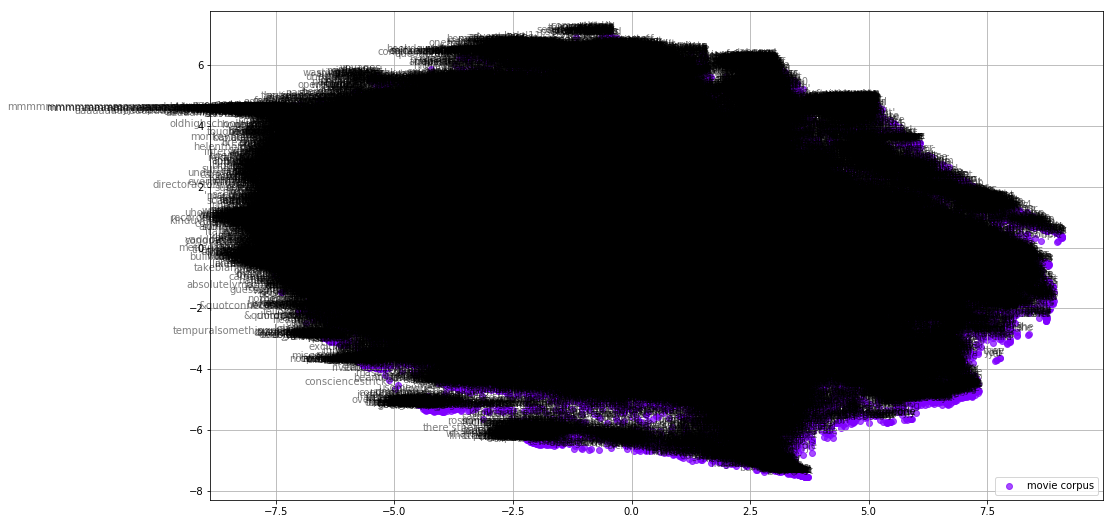

In [35]:
def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("movie_corpus.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_2d('movie corpus', embeddings_ak_2d, words_ak, a=0.7)

In [81]:
corpus_words=[]
for i in corpus_data:
    for j in i:
        corpus_words.append(j)
corpus_word=list(set(corpus_words))      
len(corpus_word)


68808

In [72]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE # make multi-dimension vectors into 2D or 3D
import numpy as np
% matplotlib inline

find_words=['office','wow','garden','take','hi','hello','king','queen','woman','man','better','good','bad','wonderful','make','worse','cheer','bye','you','they','i','me','who','we','she','he']

corpus_words_ak = []
corpus_embeddings_ak = []
for word in find_words:
    corpus_embeddings_ak.append(model.wv[word])
    corpus_words_ak.append(word)
    
pprint(corpus_words_ak[:10])
pprint(corpus_embeddings_ak[:2])  


corpus_tsne_model_ak_2d = TSNE(perplexity=8, n_components=2, init='pca', n_iter=250, random_state=16)
corpus_embeddings_ak_2d = corpus_tsne_model_ak_2d.fit_transform(corpus_embeddings_ak)

['office',
 'wow',
 'garden',
 'take',
 'hi',
 'hello',
 'king',
 'queen',
 'woman',
 'man']
[array([-0.16407566,  0.15071757,  1.8950485 ,  2.0461876 ,  0.73096085,
       -1.3277518 , -0.6183771 , -0.75262845,  0.44719234, -1.7522112 ,
       -0.98627317,  0.41834065,  0.38543963, -4.6658616 , -2.3143632 ,
        0.3287616 , -0.04304323,  0.17671058, -0.31999028,  1.4219999 ,
       -1.6984109 , -1.809195  ,  2.2323835 ,  1.4659244 , -0.24579011,
       -0.8022976 ,  0.37981284, -1.4957447 , -0.6565895 , -0.4169289 ,
        0.32594988,  1.0205853 ,  1.34503   , -0.748983  ,  0.46519774,
        0.23171154, -1.0855572 , -0.8652651 , -1.4782287 , -1.9024926 ,
        0.35517818,  0.76847124,  0.99863744, -0.9716668 ,  1.106644  ,
        1.4287156 , -2.7946138 ,  1.4274236 , -1.5012953 , -1.0250182 ],
      dtype=float32),
 array([ 1.030968  , -0.42936185,  1.1434457 ,  1.0061369 ,  0.03997399,
        0.34575647, -0.14885956,  0.08997606,  0.5139306 , -0.02225593,
       -0.38330194

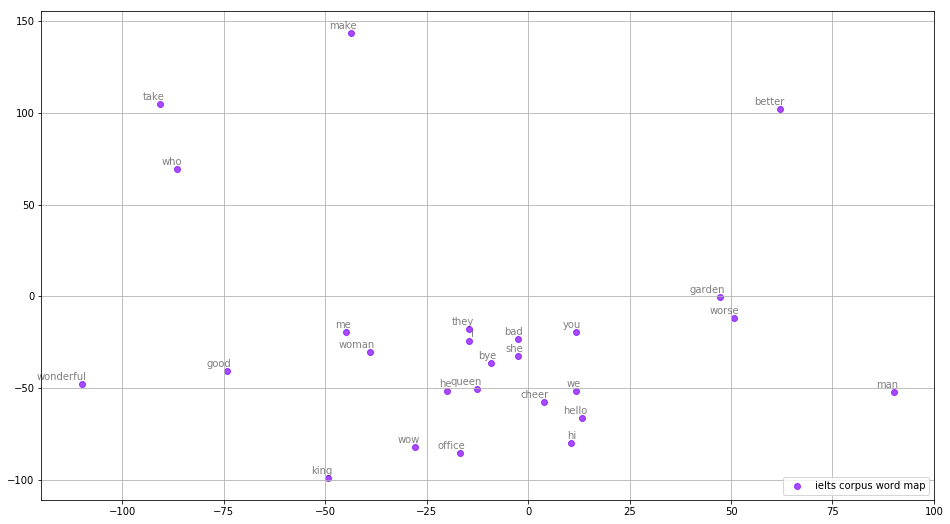

In [73]:
def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16,9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("ielts_corpus.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_2d('ielts corpus word map', corpus_embeddings_ak_2d, find_words, a=0.7)

In [76]:
embedding_clusters = [] # embedding_clusters= [embeddings]
word_clusters = [] # word_clusters= [words]
for word in list(model.wv.vocab)[1000:3000]:
    embeddings = [] # save the vectors of list(words)
    words = [] # save the words
    for similar_word, _ in model.wv.most_similar(word, topn=8):
        words.append(similar_word)
        embeddings.append(model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)
word_clusters[:5]

C:\Users\gartl\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[['reception',
  'rehearsal',
  'lounge',
  'session',
  'picnic',
  'inn',
  'holidays',
  'gym'],
 ["bastard's",
  'delinquent',
  'ga',
  'vanderhof',
  'gina',
  "andy's",
  'eliza',
  'vitelli'],
 ['vandalism',
  "starfleet's",
  'effectively',
  'alleged',
  'demanded',
  'visual',
  "another's",
  'guilder'],
 ['woman', 'creature', 'thing', 'man', 'conductor', 'girl', 'guy', 'child'],
 ['sinclair',
  'marr',
  'gennero',
  'bodwin',
  'udall',
  'boatwright',
  'sisco',
  'carrie']]

In [77]:
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=350, random_state=16)# n_components=dimension of outer space
                                                                                              # perplexity= context of TSNE, related to the number of nearest neighbours. As the number goes up, data clustered in a tighter way
                                                                                              #PCA reduce dimension
                                                                                              #n_iter= Maximum number of iterations for the optimization. Should be at least 250.
                                                                                              #random_state= fixed number: it will produce exact same results in different runs of the program
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

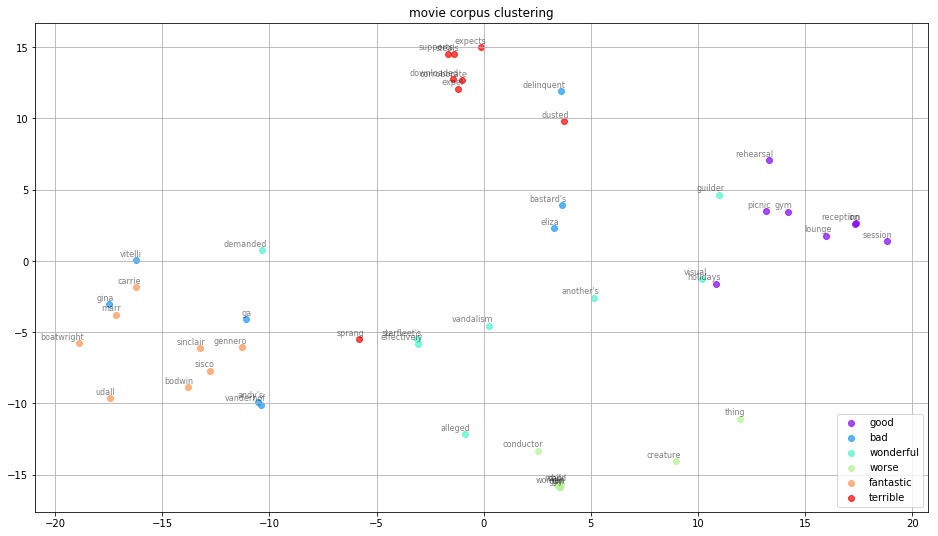

In [78]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline

target_word=['good','bad','wonderful','worse','fantastic','terrible'] #keyword
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels))) # len(labels)=colour of target words
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label) #alpha: parametre for colour of dot, higher alpha = clear image
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)# xy: coordinate of (x,y), xytext: The position (x,y) to place the text at, textcoords=offset from xy value
    plt.legend(loc=4) # bottom-right position
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('movie corpus clustering', target_word, embeddings_en_2d, word_clusters, 0.7,
                        'movie_corpus_clustering.png')
